# Eigendecomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

## Matrices as linear transformations

In [4]:
A = np.array([[-1, 3], [2, -2]])
print(A)

[[-1  3]
 [ 2 -2]]


In [5]:
v = np.array([[2], [1]])
print(v)

[[2]
 [1]]


[[1]
 [2]]


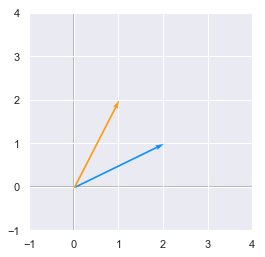

In [6]:
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()

## Eigenvectors and eigenvalues

In [7]:
A = np.array([[5, 1], [3, 3]])
print(A)

[[5 1]
 [3 3]]


In [8]:
v = np.array([[1], [1]])
print(v)

[[1]
 [1]]


[[6]
 [6]]


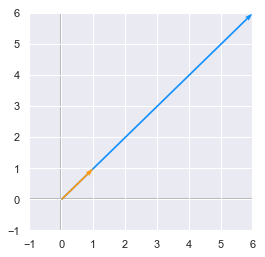

In [9]:
Av = A.dot(v)
print(Av)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.xticks(np.arange(-1, 7, 1))
plt.yticks(np.arange(-1, 7, 1))
plt.show()

## Find eigenvalues and eigenvectors

In [10]:
A = np.array([[5, 1], [3, 3]])
print(A)

[[5 1]
 [3 3]]


In [11]:
np.linalg.eig(A)

(array([6., 2.]), array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

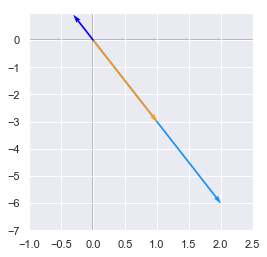

In [12]:
v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.ylim(-7, 1)
plt.xticks(np.arange(-1, 3, 0.5))
plt.yticks(np.arange(-7, 1, 1))
plt.show()

## Concatenating eigenvalues and eigenvectors

In [13]:
V = np.array([[1, 1], [1, -3]])
print(V)

[[ 1  1]
 [ 1 -3]]


In [14]:
V_inv = np.linalg.inv(V)
print(V_inv)

[[ 0.75  0.25]
 [ 0.25 -0.25]]


In [15]:
lambdas = np.diag([6,2])
print(lambdas)

[[6 0]
 [0 2]]


In [16]:
print(V.dot(lambdas).dot(V_inv))

[[5. 1.]
 [3. 3.]]


## Real symmetric matrix

In [17]:
A = np.array([[6, 2], [2, 3]])
print(A)

[[6 2]
 [2 3]]


In [18]:
eigVals, eigVecs = np.linalg.eig(A)
print(eigVecs)

[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [19]:
eigVals = np.diag(eigVals)
print(eigVals)

[[7. 0.]
 [0. 2.]]


In [20]:
print(eigVecs.dot(eigVals).dot(eigVecs.T))

[[6. 2.]
 [2. 3.]]


## Visualizing linear transformations

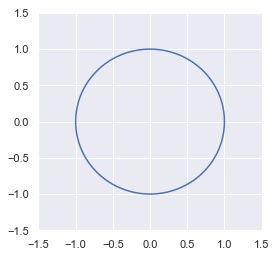

In [21]:
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

plt.figure()
plt.plot(x, y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [22]:
def linearTransformation(transformMatrix):
    orange = '#FF9A13'
    blue = '#1190FF'
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)

    # Calculate eigenvectors and eigenvalues
    eigVecs = np.linalg.eig(transformMatrix)[1]
    eigVals = np.diag(np.linalg.eig(transformMatrix)[0])

    # Create vectors of 0 to store new transformed values
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        # Apply the matrix to the vector
        newXY = transformMatrix.dot(unitVector_i)
        newX[i] = newXY[0]
        newY[i] = newXY[1]

    plotVectors([eigVecs[:,0], eigVecs[:,1]],
                cols=[blue, blue])
    plt.plot(x, y)

    plotVectors([eigVals[0,0]*eigVecs[:,0], eigVals[1,1]*eigVecs[:,1]],
                cols=[orange, orange])
    plt.plot(newX, newY)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

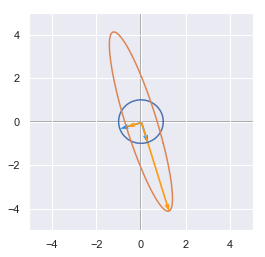

In [23]:
A = np.array([[1,-1], [-1, 4]])
linearTransformation(A)

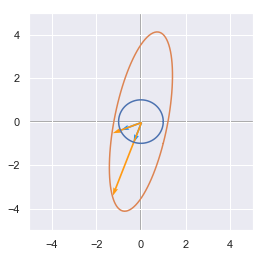

In [24]:
A = np.array([[1,1], [-1, 4]])
linearTransformation(A)